<a href="https://colab.research.google.com/github/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

# Churn Prediction

Customer churn, when a customer ends their relationship with a business, is one of the most basic factors in determining the revenue of a business. You need to know which of your customers are loyal and which are at risk of churning, and you need to know the factors that affect these decisions from a customer perspective. 

This code pattern explains how to build a machine learning model and use it to predict whether a customer is at risk of churning. This is a full data science project, and you can use your model findings for prescriptive analysis later or for targeted marketing.

## Project Initial Setup

In [5]:
# install scikit plot package
!pip install scikit-plot

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

# configure graph style
sns.set_style('darkgrid')
#palette=sns.color_palette("GnBu_d")
#palette=sns.color_palette("BuGn_r")
#palette = sns.light_palette("navy", reverse=True)
palette = sns.color_palette("coolwarm", 7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## The Data

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

### *Importing dataset*

In [7]:
# importing data
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# check first 5 entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Data Dictionary*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']





### *Dataframe size and info*

In [8]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
get_df_size(df)

Dataset dimensions 
# Attributes:  21 
# Entries:  7043 



### *Features and data types*

The feature `TotalCharges` got read by Pandas as `object` data type. This have impacts during the exploratory analysis and have to be handled. We will convert datatype to `float64` in the coming sections.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Analysis








### Checking missing values

Before checking the missing values, we are going to replace all the blank spaces ocurreces that this dataset might have.

In [10]:
# replacing all the blank values with NaN 
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



After that we can see that feature `TotalCharges` has 11 missing values. We are going to replace these missing values by the `TotalCharges` median.

In [11]:
total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)

### Converting data types

While importing dataset, Pandas read the column `TotalCharges` as object because it had some entries populated with blank spaces instead of `NaN` value. For the analysis we will convert datatype of this feature from `object` to `float64`.

In [12]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

### Unique values per feature

By checking feature's unique values we can see that the column `customerID` have unique identifiers for each customer, which confirms that each row represents a single customer. This feature does not contribute for this analysis, therefore we are going to drop the column.

In [13]:
print("Unique values (per feature): \n{}\n".format(df.nunique()))

Unique values (per feature): 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



In [14]:
df_clean = df_clean.drop('customerID', axis=1)

### *Descriptive statistics*

In [15]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


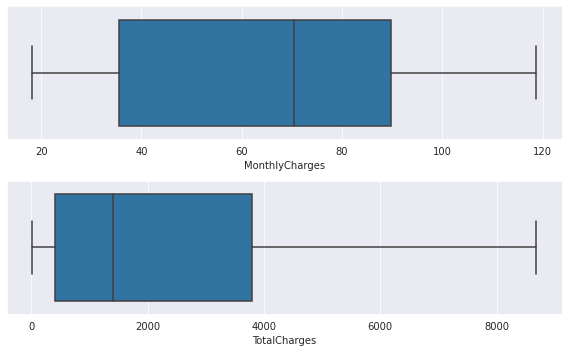

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5))

sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])

plt.tight_layout()

### *Dataset features and their values*

This is a very important information to help us to undesrstand the dataset will be working with. Few observations:


*   Feature `SeniorCitizen` is binary, entries have value 1 for **Yes** and 0 for **No**
*   Feature `Tenure` has the max value in 72, which can indicate that this service provider has maximum of 6 years
*   The only features that are not categorical are `Monthly Charges` and `TotalCharges`, all the remaining are categorical kinds



In [17]:
features_obj = df_clean.columns

for f in features_obj:
  print(f)
  print(np.unique(df_clean[f].values))

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
tenure
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'No phone service' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'No internet service' 'Yes']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'No internet service' 'Yes']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
TotalCharges
[  18.8 

### *Customer lifespan*

#### *Helper Functions*

In [18]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

#### *How long is the customer lifespan until subscription cancellation?*

- The majority of churn rate is observed on the subscription first month, totalling 20,3% of subscribers leave on the first month
- Most of the subscribers leave on the first 3 months, totalling 31.9% of the total churn


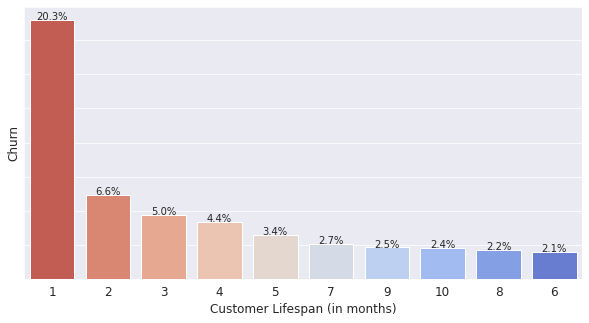

In [19]:
p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

### *Understanding the profile of churn customers*

#### *Helper Functions*

In [20]:
# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Display countplot based on a set of features

    # Arguments
      cat_list: array, List of features
      df: DataFrame, dataset
      rows: int, number of rows
      columns: int, number of columns
      figsize: figure size, e.g (10, 5)

  """

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette=palette)

    plt.xticks(size=12)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    #ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

    print_rate(ax, df.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=600)

In [21]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_churn.loc[df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

personal_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']

#### *a) In terms of personal attibutes*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*   `Gender`
*   `SeniorCitizen`
*   `Partner`
*   `Dependents`




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


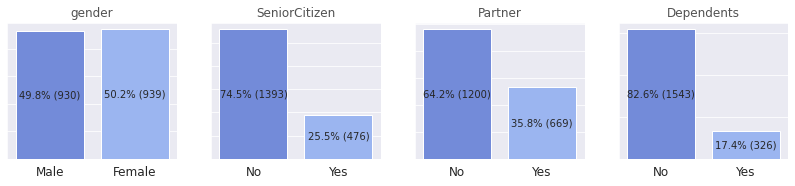

In [22]:
displayCountPlot(personal_attributes, df_churn, rows=1, columns=4, export=True)

#### *b) In terms of services*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`PhoneService`
*	`MultipleLines`
*	`InternetService`
*	`OnlineSecurity`
*	`OnlineBackup`
*	`DeviceProtection`
*	`TechSupport`
*	`StreamingTV`
*	`StreamingMovies`




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


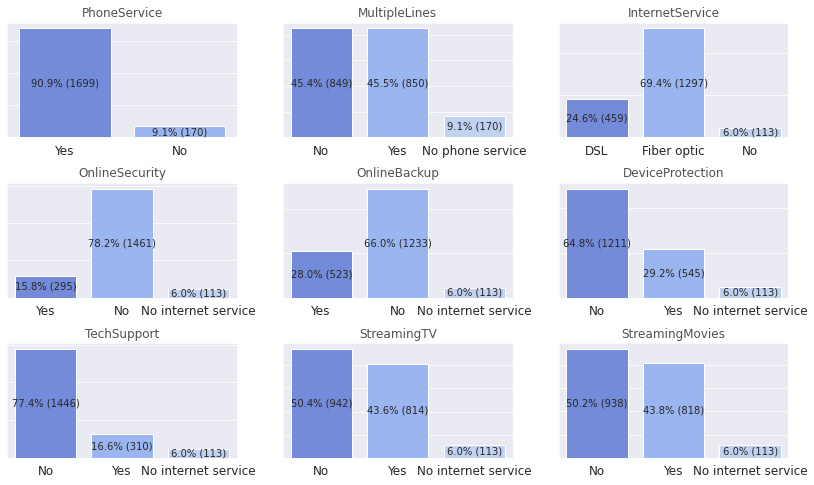

In [23]:
displayCountPlot(services_attributes, df_churn, rows=3, columns=3, figsize=(14,8), export=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


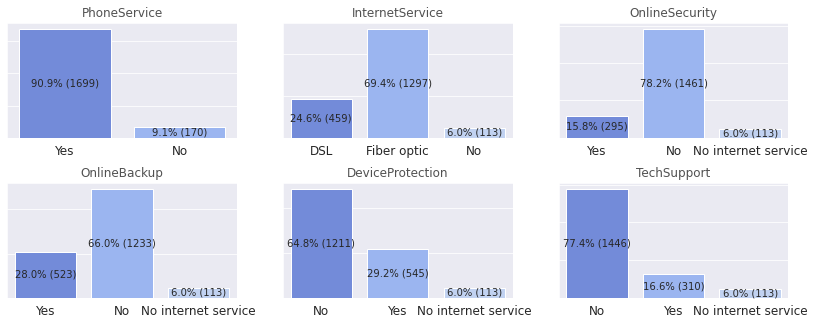

In [24]:
services_attributes_filtered = ['PhoneService', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport',]

displayCountPlot(services_attributes_filtered, df_churn, rows=3, columns=3, figsize=(14,8), export=True)

#### *c) In terms of contract aspects*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`Contract`
*	`PaperlessBilling`
*	`PaymentMethod`




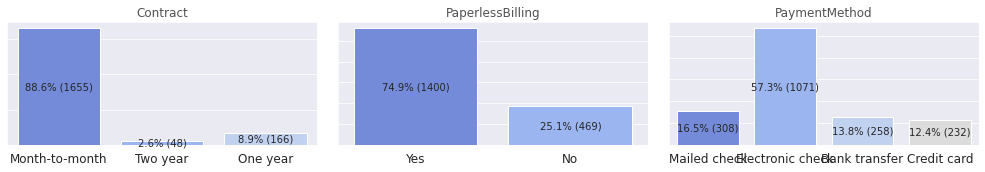

In [25]:
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

displayCountPlot(contract_attributes, df_churn, rows=1, columns=3)

### *Imbalanced data*

Column `Churn` is the target vector to be used to train the ML models. The class `No` have much more entries then class `Yes`, which demonstrates that the dataset is highly imbalanced. Ideally the dataset should be balanced to avoid models overfitting.

5174
1869


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


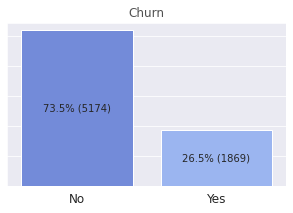

In [26]:
print(df_clean[df_clean['Churn'] == 'No'].shape[0])
print(df_clean[df_clean['Churn'] == 'Yes'].shape[0])

"""fig, ax = plt.subplots()
sns.countplot(df_clean['Churn'], palette=palette)

plt.xticks(size=12)
plt.xlabel('Churn', size=12)
plt.yticks(size=12)
plt.ylabel('# Customers', size=12)"""

displayCountPlot(['Churn'], df_clean, rows=1, columns=1, figsize=(5,3), export=True)

## Data Preparation








### *Split features into binary, numeric or categorical*

In [27]:
binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]

df_proc = df_clean.copy()

### *Features encoding*

#### *a) Apply label encoding for binary features*

In [28]:
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[f].values))

gender 
 ['No' 'Yes']
SeniorCitizen 
 ['No' 'Yes']
Partner 
 ['No' 'Yes']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
PaperlessBilling 
 ['No' 'Yes']
Churn 
 [0 1]


#### *b) Convert categorical variable into dummy variables*

In [29]:
print(categorical_feat)
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
print(df_proc.columns)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',


### *Processed dataset / Ready for ML training*

In [30]:
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')

df_proc.head()

Original dataset: 
# Attributes:  21 
# Entries:  7043 

Processed dataset: 
# Attributes:  41 
# Entries:  7043 



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


### *Split train and test data*

In [31]:
# split df_proc in feature matrix and target vector
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Machine Learning Model

### *Helper Functions*

In [32]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score gor a given list of models

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

### *Balancing the data*

In [33]:
# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_rus, header='After balancing:')

# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)

Before balancing: 
# Attributes:  40 
# Entries:  5282 

After balancing: 
# Attributes:  40 
# Entries:  2786 



(array([0, 1]), array([1393, 1393]))

### *Standardizing the data*

In [35]:
# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

### *Create baseline using Cross Validation*

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instaciate models
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)

print(df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.68100358 0.68345324 0.67625899 0.67741935 0.68817204]
recall: 0.681 (+/- 0.00)
#####  SVC  #####
scores: [0.78494624 0.77338129 0.73741007 0.7921147  0.7562724 ]
recall: 0.769 (+/- 0.02)
#####  LogisticRegression  #####
scores: [0.82437276 0.80935252 0.77697842 0.80645161 0.76702509]
recall: 0.797 (+/- 0.02)
#####  XGBClassifier  #####
scores: [0.81003584 0.82733813 0.74460432 0.82795699 0.77060932]
recall: 0.796 (+/- 0.03)
                          Recall
LogisticRegression      0.796836
XGBClassifier           0.796109
SVC                     0.768825
DecisionTreeClassifier  0.681261


### *Tuning Models*

As LogisticRegression and SVC performed better in terms of Recall metric, I'm going to use those to tune the hyperparameters and check if it can deliver even better results.

#### *Logistic Regression*

I will be tunning `solver` and `C` in the Logistic Regression model. As can be seen below it presented a slight improvement after tuned, incresing Recall from **0.80** to **0.82**. 


In [37]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.804726541347567 for {'C': 0.001, 'solver': 'liblinear'}


In [82]:
model_lr = LogisticRegression(solver='newton-cg', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1285
           1       0.52      0.82      0.64       476

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



#### *SVM Model*

I will be tunning `kernel` and `C` in the SVM model. SVM had a great improvement in Recall after tunning, increasing Recall from **0.80** to **0.91.**, which is an excelent score.

In [40]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 1, 10, 100] }

search = GridSearchCV(SVC(), param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.9325056084164928 for {'C': 0.01, 'kernel': 'poly'}


In [81]:
model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_train_rus, y_train_rus)
y_pred_svm = model_svm.predict(X_test)
svm_corr = confusion_matrix(y_test, y_pred_svm, normalize='true')

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.37      0.53      1285
           1       0.36      0.94      0.52       476

    accuracy                           0.52      1761
   macro avg       0.65      0.66      0.52      1761
weighted avg       0.79      0.52      0.53      1761



#### *Comparing LR and SVM Model*

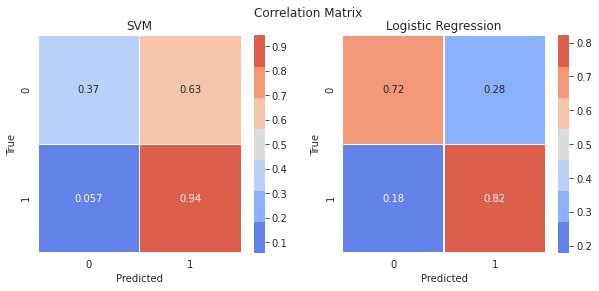

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(svm_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0])
ax[0].set_title('SVM')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1])
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

fig.savefig("correlation_.png", dpi=600)

## Conclusion